In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import spacy
import re
import pandas as pd
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from datasets import load_dataset

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("fr_core_news_md")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/lydia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lydia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lydia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# définir les stopwords
stop_words = set(stopwords.words('french'))
# ajout certains stopwords
custom_stopwords = ['avoir', 'être']
stop_words.update(custom_stopwords)

In [11]:
def word_count(text):
    words = text.split()
    return len(words)


def frequent_word(text):
    # lower case
    doc = nlp(text.lower())  
    
    # filtrer stopwords et lemmatize le reste
    filtered_lemmatized_words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]

    # compter le nombre de mots filtrés et lemmatizés
    word_counts = Counter(filtered_lemmatized_words)

    # le mot le plus fréquent et sa fréquence
    most_common_word, most_common_count = word_counts.most_common(1)[0]
    
    return most_common_word, most_common_count



In [15]:
'''
Ce bloc transforme notre fichier json en dataframe 
en comptant le nombre de mot, le mot le plus fréquent
et leur fréquence pour chaque title et content"
'''
with open('scraped_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


for item in data:
    item['title_word_count'] = word_count(item['title'])
    item['content_word_count'] = word_count(item['content'])
    word, count = frequent_word(item['content'])
    item['frequent_word'] = word
    item['frequency'] = count


df = pd.DataFrame(data)

df[:10]

,url,title,theme,content,title_word_count,content_word_count,frequent_word,frequency
0,https://www.lemonde.fr/societe/article/2024/04...,Manifestation propalestinienne à Sciences Po P...,societe,"Le premier ministre, Gabriel Attal, a affirmé ...",20,462,étudiant,6
1,https://www.lemonde.fr/international/article/2...,"Au Royaume-Uni, un député conservateur passe d...",international,"Le député conservateur Dan Poulter, ancien min...",16,230,poulter,5
2,https://www.lemonde.fr/international/article/2...,"En Irak, une nouvelle loi anti-LGBTQ+ prévoit ...",international,"Le Parlement irakien a adopté, samedi 27 avril...",12,468,loi,6
3,https://www.lemonde.fr/sport/article/2024/04/2...,"Ligue 1 : le PSG, accroché par Le Havre, doit ...",sport,Douche froide sur le Parc des Princes. Sous un...,16,579,match,6
4,https://www.lemonde.fr/politique/article/2024/...,Trois nouveaux conseillers de Prisca Thevenot ...,politique,L’hémorragie continue : après les premiers dép...,14,312,conseiller,5
5,https://www.lemonde.fr/societe/article/2024/04...,La justice annule les sanctions prises contre ...,societe,Le tribunal administratif de Paris a annulé mi...,18,332,administratif,6
6,https://www.lemonde.fr/societe/article/2024/04...,Les changements de nom de famille ont fortemen...,societe,"La possibilité de changer de nom de famille,fa...",14,448,nom,17
7,https://www.lemonde.fr/politique/article/2024/...,Le gouvernement va porter plainte contre Jean-...,politique,"La ministre de l’enseignement supérieur, Sylvi...",23,431,université,7
8,https://www.lemonde.fr/afrique/article/2024/04...,Le Burkina Faso suspend l’accès à plusieurs si...,afrique,"L’accès à sept sites d’information en ligne, d...",20,523,burkinabé,7
9,https://www.lemonde.fr/economie/article/2024/0...,JO 2024 : Valérie Pécresse assure que le prolo...,economie,Valérie Pécresse affirme que la promesse sera ...,19,414,ligne,6


In [ ]:
df.to_csv('dataframe.csv', index=False)

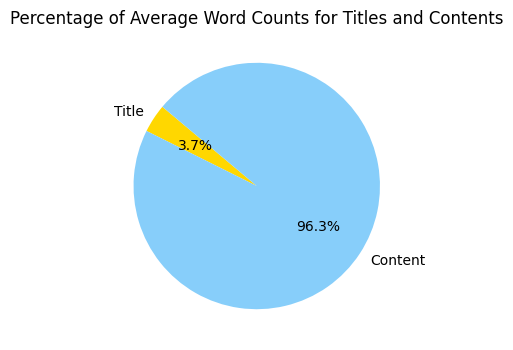

In [16]:
# counting average words of title and content
average_title_word_count = df['title_word_count'].mean()
average_content_word_count = df['content_word_count'].mean()

# Calculate total average words to get proportions for the pie chart
total_average_words = average_title_word_count + average_content_word_count
title_proportion = (average_title_word_count / total_average_words) * 100
content_proportion = (average_content_word_count / total_average_words) * 100

plt.figure(figsize=(5, 4))
plt.pie([title_proportion, content_proportion], labels=['Title', 'Content'], colors=['gold', 'lightskyblue'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Average Word Counts for Titles and Contents')
plt.show()

In [20]:
df[title_word_count]

0      6
1      5
2      6
3      6
4      5
5      6
6     17
7      7
8      7
9      6
10     5
11     5
12     6
13     2
14    10
15     6
16     4
17    12
18     7
19     5
20     5
21     5
22    10
23    12
Name: frequency, dtype: int64